<a href="https://colab.research.google.com/github/MadhumithraA1426/deep-neural-networks/blob/main/chardigit_recognition_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.FLM90L_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.FLM90L_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,327 (2.08 MB)

 Trainable params: 545,327 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.5277 - loss: 1.6948 - val_accuracy: 0.7960 - val_loss: 0.6497
Epoch 2/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7633 - loss: 0.7456 - val_accuracy: 0.8224 - val_loss: 0.5484
Epoch 3/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7946 - loss: 0.6276 - val_accuracy: 0.8327 - val_loss: 0.5089
Epoch 4/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8094 - loss: 0.5689 - val_accuracy: 0.8354 - val_loss: 0.4849
Epoch 5/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8214 - loss: 0.5305 - val_accuracy: 0.8409 - val_loss: 0.4701
Epoch 6/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8278 - loss: 0.5047 - val_accuracy: 0.8479 - val_loss: 0.4549
Epoch 7/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8335 - loss: 0.4853 - val_accuracy: 0.8467 - val_loss: 0.4523
Epoch 8/10
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8357 - loss: 0.4711 - 

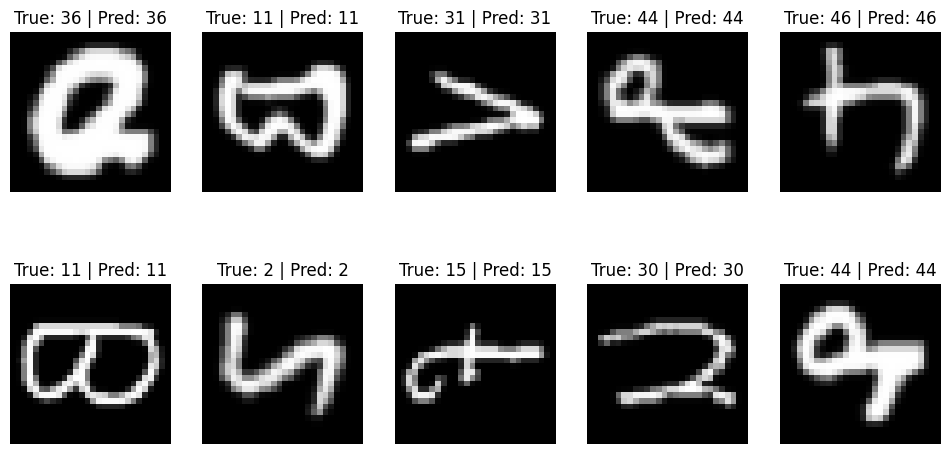

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1])
    return image, label

batch_size = 128
ds_train = ds_train.map(normalize_img).cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

num_classes = ds_info.features['label'].num_classes

model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

import numpy as np

for images, labels in ds_test.take(1):
    preds = model.predict(images)
    preds_cls = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(tf.reshape(images[i], (28, 28)), cmap='gray')
        plt.title(f"True: {labels[i].numpy()} | Pred: {preds_cls[i]}")
        plt.axis('off')
    plt.show()